In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ast import literal_eval
pd.set_option('display.max_columns', None)

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
# data_df = data_df.drop(columns = data_df.columns[0], axis = 1)
data_df

/home/lexua/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,Population size,Life span,Top speed,Weight,Height,Length,Biome,Climate,Mating behavior,Reproduction season,Pregnancy duration,Baby carrying,Independent age,Female name,Male name,Baby name,Incubation period,Population trend,Population status,Attributes,Continents,Subcontinents,Countries,Regions,Wwf biomes,Group name,Diet,Biogeographical realms,Lifestyle,Seasonal behavior
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,"400,000","(10.0, 20.0)",75.0,16-60 kg,80-85 cm,105-160 cm,"['Wetlands ', 'Shrubland', 'Forest', 'Mountain...","['Temperate', 'Cold', 'Polar', 'Tropical']",Monogamy,January-April,60-63 days,1-14 pups,45 days,bitch,dog,"pup, whelp",NaN,Stable,Least concern (LC),"['Nocturnal', 'Carnivore', 'Scavenger', 'Terre...","['Asia', ' Europe', ' North America', ' Africa']","['South Asia', ' Western Asia', ' Southeast As...","['Albania', ' Armenia', ' Azerbaijan', ' Belar...","['Czech Republic', ' Estonia', ' Finland', ' F...","['Nearctic', ' Palearctic', ' Indomalayan', ' ...","['pack', ' route', ' rout']","['Carnivore', '', 'Scavenger']",['Greenland'],"['Terrestrial', ' Cursorial', ' Altricial', ' ...",['Not a migrant']
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,"2,154-3,159","(10.0, 15.0)",96.0,65-306 kg,NaN,200-390 cm,"['Forest', 'Rainforest', 'Montane forest', 'Ri...","['Tropical', 'Temperate']",Polygyny,November-April,103 days,1-7 cubs,18 mos-3 yrs,NaN,NaN,cub,NaN,Decreasing,Endangered (EN),"['Nocturnal', 'Carnivore', 'Cursorial', 'Terre...",['Asia'],"['South Asia', ' Southeast Asia', ' East Asia']","['Bangladesh', ' Bhutan', ' China', '', ' Indi...",['Thailand'],"['Palearctic', ' Indomalayan']",[],['Carnivore'],"['Tibet', ' Yunnan']","['Cursorial', ' Terrestrial', ' Ambush predato...",['Not a migrant']
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,"200,000","(20.0, 50.0)",56.0,100-635 kg,70-153 cm,1.4-2.8 m,"['Forest', 'Woodland']","['Temperate', 'Cold', 'Polar']","Polygynandry,",May-July,8 weeks,1-4 cubs,2-4 years,sow,boar,cub,NaN,Stable,Least concern (LC),"['Crepuscular', 'Omnivore', 'Terrestrial', 'Al...","['Asia', ' Europe', ' North America']","['South Asia', ' Western Asia', ' East Asia', ...","['Albania', ' Armenia', ' Austria', ' Azerbaij...",[],"['Nearctic', ' Palearctic', ' Indomalayan']","['sloth', ' sleuth']",['Omnivore'],"['Estonia', ' Finland', ' France', ' Georgia',...","['Terrestrial', ' Altricial', ' Nomadic', ' Te...","['Hibernating', ' Migrating']"
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,10-25 Thou,"(80.0, 90.0)",20.0,100-160 t,NaN,25-30 m,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Monogamy,winter or early spring,1 year,1 calf,8 months,cow,bull,calf,NaN,Increasing,Endangered (EN),"['Carnivore', 'Piscivores', 'Aquatic', 'Precoc...","['Africa', ' South America', ' Oceania', ' Nor...","['Sub-Saharan Africa', ' Caribbean Islands', '...","['Angola', ' Argentina', ' Australia', ' Baham...","['Chile', ' China', ' Colombia', ' Comoros', '...",[],"['pod', ' gam', ' herd', ' school', ' mod']","['Carnivore', '', 'Piscivores']","['Atlantic Ocean', ' Pacific Ocean']","['Aquatic', ' Precocial', ' Natatorial', ' Viv...",['Migrating']
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,"50,000","(30.0, 100.0)",45.0,3-6 t,NaN,6-9 m,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Polygynandry,"year-round, usually in summer",15-18 months,1 calf,2 years,cow,bull,calf,NaN,NaN,NaN,"['Diurnal', 'Carnivore', 'Aquatic', 'Precocial...","['Africa', ' Oceania', ' Antarctica', ' North ...","['North Africa', ' Caribbean Islands', ' South...","['Algeria', ' Antigua', 'Barbuda'

In [6]:
def try_eval(inp):
    try:
        return literal_eval(inp)
    except:
        return []


for i in data_df:
    if type(data_df[i][0]) == str and data_df[i][0][0] == "[":
        data_df[i] = data_df[i].apply(try_eval)

In [7]:
def stat_list_col(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # missing_ratio
    data.append(round((100 - (len(temp) / len(array[col]) * 100)), 1))
    # num_values
    temp = np.hstack(temp)
    temp = list(map(str.strip, temp)) # Xử lý các dấu cách đầu và cuối mỗi chuỗi
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [8]:
list_col_info_df = pd.DataFrame(index = ['missing_ratio', 'num_values', 'value'])
for i in data_df:
    if type(data_df[i][0]) == list:
        list_col_info_df[i] = stat_list_col(i, data_df)
list_col_info_df

,Biome,Climate,Attributes,Continents,Subcontinents,Countries,Regions,Wwf biomes,Group name,Diet,Biogeographical realms,Lifestyle,Seasonal behavior
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,43,6,139,128,72,248,417,265,398,30,412,47,8
value,Abyssal zone 3 Agricultural ...,Arid 274 Cold 281 Libya ...,Aestivation 71 Algivore ...,67 Africa 1700 ...,35 Angola 3 Arge...,2513 Afghanistan 87 ...,570 Acre 5 Af...,152 Afghanistan ...,"1 ""bind"" 1 ""littl...",2972 Algivore 18 ...,548 Afghanistan ...,7400 Aestivation ...,...


### Động vật thích sống ở đâu nhất?

In [9]:
def draw_bar_chart(data, title, xlabel, ylabel):
    plt.barh(data.keys(),data.values, height = 0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Theo môi trường sống**

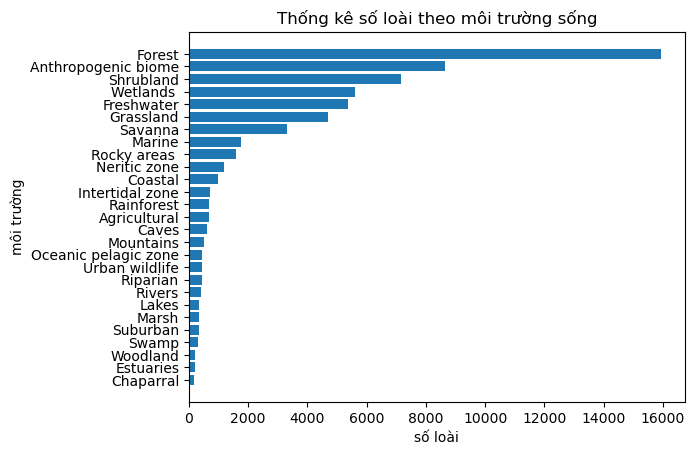

In [11]:
animal_by_biome = data_df['Biome'].explode().value_counts()
draw_bar_chart(animal_by_biome[26::-1], 'Thống kê số loài theo môi trường sống', 'số loài', 'môi trường')

**Theo điều kiện khí hậu**

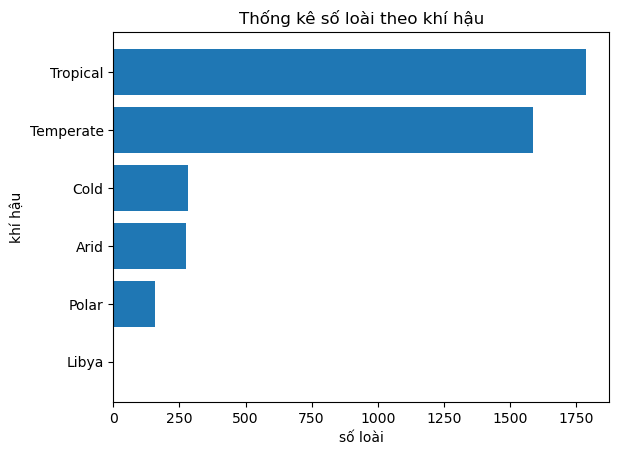

In [12]:
animal_by_climate = data_df['Climate'].explode().value_counts()
draw_bar_chart(animal_by_climate[::-1], 'Thống kê số loài theo khí hậu', 'số loài', 'khí hậu')

**Nhận xét:**

### Chủng loài nào xuất hiện nhiều nơi  trên trái đất nhất

Chủng loài nói đến ở đây là bậc phân loại. Chúng ta cần chọn một bậc phân loại phù hợp để trả lời câu hỏi này. Bậc Ngành thì quá chung chung, mà nếu chọn mức phân loại thấp như chi, loài thì số lượng quá nhiều. Vì vậy nhóm chúng em quyết định chọn bậc phân loại là Lớp và Bộ. Vậy câu hỏi của chung ta sẽ là Lớp (Bộ) nào xuất hiện nhiều nhất trên trái đất.

**Mức lục địa**

In [14]:
animal_by_continents = data_df[['Order','Class','Continents']]
animal_by_continents=animal_by_continents.explode('Continents').dropna()
animal_by_continents

,Order,Class,Continents
0,Carnivora,Mammalia,Asia
0,Carnivora,Mammalia,Europe
0,Carnivora,Mammalia,North America
0,Carnivora,Mammalia,Africa
1,Carnivora,Mammalia,Asia
...,...,...,...
27723,Passeriformes,Aves,South America
27724,Passeriformes,Aves,South America
27725,Passeriformes,Aves,South America
27726,Passeriformes,Aves,South America


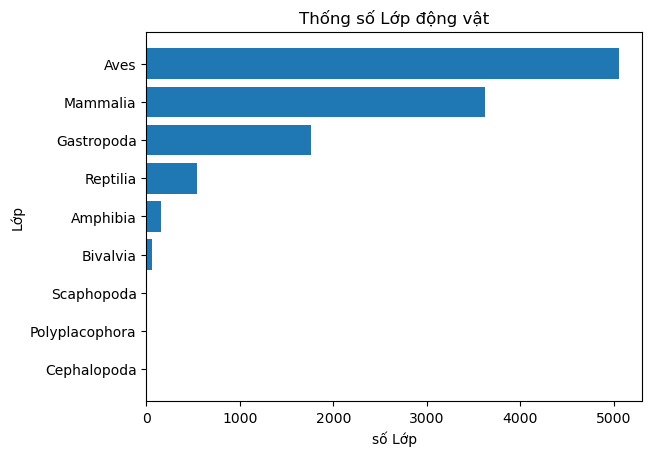

In [15]:
df = animal_by_continents.groupby('Class').Continents.count()
draw_bar_chart(df.sort_values(), 'Thống số Lớp động vật', 'số Lớp', 'Lớp')

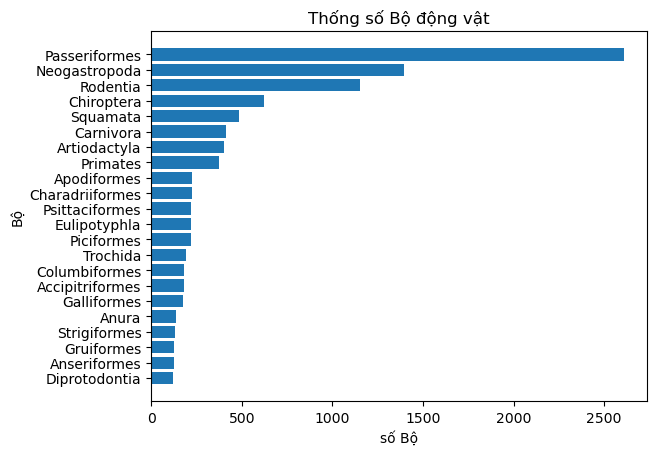

In [16]:
df = animal_by_continents.groupby('Order').Continents.count()
df = df.sort_values(ascending=False)[:22]
draw_bar_chart(df[-1::-1], 'Thống số Bộ động vật', 'số Bộ', 'Bộ')

**Mức quốc gia**

In [19]:
animal_by_countries = data_df[['Order','Class','Countries']]
animal_by_countries=animal_by_countries.explode('Countries').dropna()
animal_by_countries

,Order,Class,Countries
0,Carnivora,Mammalia,Albania
0,Carnivora,Mammalia,Armenia
0,Carnivora,Mammalia,Azerbaijan
0,Carnivora,Mammalia,Belarus
0,Carnivora,Mammalia,Bhutan
...,...,...,...
27726,Passeriformes,Aves,Brazil
27726,Passeriformes,Aves,Guyana
27726,Passeriformes,Aves,Suriname
27726,Passeriformes,Aves,Venezuela


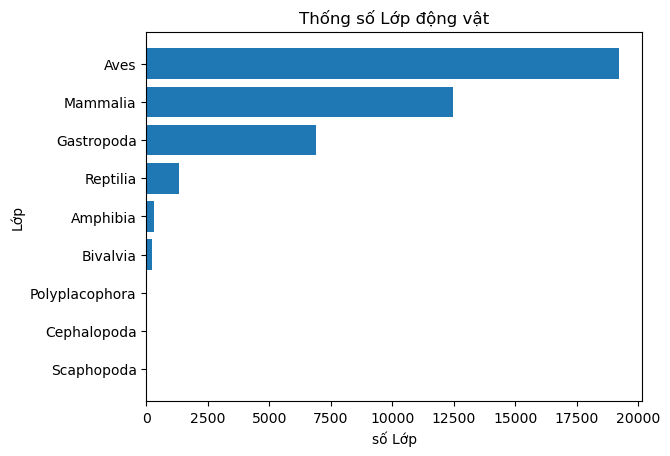

In [20]:
df = animal_by_countries.groupby('Class').Countries.count()
draw_bar_chart(df.sort_values(), 'Thống số Lớp động vật', 'số Lớp', 'Lớp')

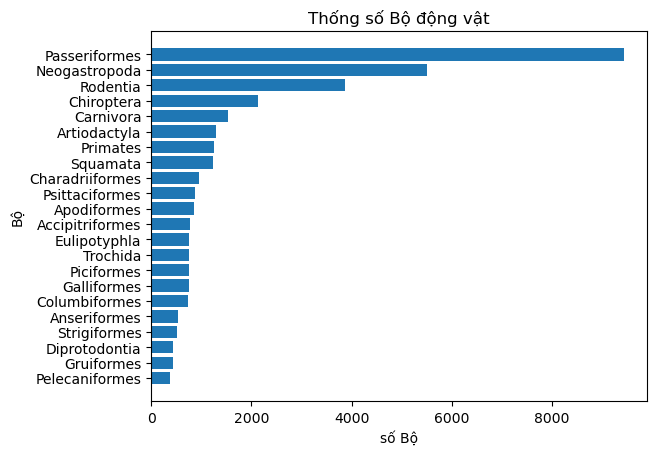

In [21]:
df = animal_by_countries.groupby('Order').Countries.count()
df = df.sort_values(ascending=False)[:22]
draw_bar_chart(df[-1::-1], 'Thống số Bộ động vật', 'số Bộ', 'Bộ')

**Nhận xét**